# HW2: Collecting and Cleaning Data


1. Data formats: In Python, the object pandas.DataFrame stores a rectangular data structure, and the object Dictionary is flexible like a JSON object. In class we used `pandas.DataFrame.from_dict(mydict,orient="index")` to transform a Dictionary of dictionaries into a DataFrame. What is required for this operation to give the desired outcome: 

    a. That every dictionary inside mydict has elements with the same names
    
    b. That there is only one dictionary inside mydict
    
    c. That each dicotionary inside mydict has a single element
    
    d. This function will always give a DataFrame which is equivalent to mydict
    
1. Problem: JSON objects and Dictionaries

1. Downloading and analyzing data: Query Google Trends for searches of pasta compared to rice in the entire year 2018. Check out the statistics by country and enjoy the interesting (and not surprising) georgraphic distribution. Download the statistics by country (DO NOT check the Include low search volume regions checkbox). Calculate how many of the reported countries had more searches for pasta than rice: 

    a. 53

    b. 8

    c. 31

    d. 15

2. How many European countries in this list have more searches for rice than pasta?

    a. 0

    b. 2

    c. 4

    d. 6

3. Download from [Gapminder data repository](https://www.gapminder.org/data/) the life expectancy data for all countries in the years 1900-1999 (you may load a bigger dataset and concentrate on this part). Extract from this countries that have data for all years in the range 1900-1999. You should get 184 countries. Create for each of these the average age for each decade (1900-1909, 1910-1919,...), creating a matrix of 184\*10 averages. Find out all the cases that a country had a higher life expectancy in one decade compared to both the deacdes before and after. How many countries have at least one such decade? 

    a. 67

    b. 70

    c. 78

    d. 105

4. In which decade the most countries experienced a decrease in life expectancy compared to the previous decade? (see if you can think of a reason)

    a. 1910's compared to 1900's

    b. 1920's compared to 1910's

    c. 1950's compared to 1940's

    d. 1980's compared to 1970's

1. Scraping: Consider the following html snippet:

    ```
    html_doc = """

    <html><head><title>The Dormouse's story</title></head>
    <body>
    <p class="title"><b>The Dormouse's story</b></p>

    <p class="story">Once upon a time there were three little sisters; and their names were
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
    and they lived at the bottom of a well.</p>

    <p class="story">Here is an image of Elsie: <a href="http://example.com/elsie"><img src = "elsie.png"></a></p>
    <p class="story">And here is an image of Lacie: <a href="http://example.com/lacie"><img src = "lacie.png"></a></p>
    """
    ```

    We would like to get a list of the three little sisters names. Fill in the missing line of the following function:

    ```
    from bs4 import BeautifulSoup

    soup = BeautifulSoup(html_doc)

    def get_sisters_names(soup):
        # missing line 1 #
        return [sister.get_text() for sister in sisters]
    ```

    a. `sisters = soup.find_all('sister')`

    b. `sisters = soup.find_all('a')`

    c. `sisters = soup.find_all('a', {'class': 'sister'})`

    d. `sisters = soup.find_all(class = 'sister')`

2. Now we would like to get only the raw text of the Doormouse story, not including the title. Fill in the missing line of the following function:

    ```
    def get_story(soup):
        # missing line 1 #
        story = ''
        for p in paragraphs:
            # missing line 2 #
            if class_name == 'story':
                story += p.get_text() + ' '
        return ' '.join(story.split())
    ```

    a. line 1: `paragraphs = soup.find_all('p')`; line 2: `class_name = p['class'][0]`

    b. line 1: `paragraphs = soup.find_all('p', {'class': 'story'})`; line 2: `class_name = p['class']`

    c. line 1: `paragraphs = soup.find_all('p', {'class': 'story'})`; line 2: `class_name = p.find('class')[0]`

    d. line 1: `paragraphs = soup.find_all('story')`; line 2: `class_name = p.attr['class']`

3. What will be the result of calling the following function on our `soup` object (i.e. `does_something(soup)`)?

    ```
    def does_something(soup):
        return [e['src'].split('.')[0] for e in soup.find_all('img')]
    ```

    a. `['elsie.png', 'lacie.png']`

    b. `['elsie', 'lacie']`

    c. `{'src': ['elsie', 'lacie']}`

    d. The function will throw an exception on our `soup` object

4. The class notes contain code to scrape the Beatles discography and prepare a list of Albums. If we change the line 
       `if re.match(re.compile('^List of(.+?)albums'), header):` 
   to 
       `if re.match(re.compile('^List of EPs'), header):` 
   we get a list of EPs, however they only contain 17 EPs and not 21 as in the original list. What is the reason for this? 

    a. That the titles are repetitive and therefore the Python dictionary cannot distinguish between them

    b. That the html table only has 17 rows 

    c. That the other four don't have hyperlinks and therefore `title_col.find('a')` does not find them

    d. That the check `release_date is not None` fails for the other four

7. Cleaning Data: Which one of the following data tables is "tidy"?

a. 
```
pd.DataFrame({
    'student': np.concatenate([np.tile('John', 5), np.tile('Paul', 5)]),
    'before': np.random.randint(10, size = 10),
    'after': np.random.randint(10, size = 10)
})
```

b. 
```
pd.DataFrame({
    'time': np.concatenate([np.tile('before', 5), np.tile('after', 5)]),
    'John': np.random.randint(10, size = 10),
    'Paul': np.random.randint(10, size = 10)
})
```

c.
```
pd.DataFrame({
    'student': np.concatenate([np.tile('John', 10), np.tile('Paul', 10)]),
    'time': np.tile(np.concatenate([np.tile('before', 5), np.tile('after', 5)]), 2),
    'measurement': np.random.randint(10, size = 20)
})
```

d.
```
pd.DataFrame({
    'student': np.concatenate([np.tile('John', 5), np.tile('Paul', 5)]),
    'time': np.concatenate([np.tile('before', 5), np.tile('after', 5)]),
    'measurement': np.random.randint(10, size = 10)
})
```

<br>


In [4]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 15.1MB/s ta 0:00:01
    100% |████████████████████████████████| 8.9MB 1.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.9MB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 26.6MB 563kB/s eta 0:00:01
    100% |████████████████████████████████| 12.9MB 3.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/61/28/1d3920e4d1d50b19bc5d24398a7cd85cc7b9a75a490570d5a30c57622d34/pytz-2018.9-py2.py3-none-any.whl
    100% |████████████████████████████████| 952kB 10.2MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 16.5MB/s ta 0:00:01


In [6]:
import seaborn as sns
help (sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

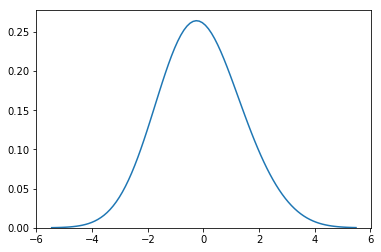

In [23]:
import numpy as np
import seaborn as sns
x=np.random.normal(size=100)
sns.kdeplot(x, bw=1)

In [21]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Fit and plot a univariate or bivariate kernel density estimate.
    
    Parameters
    ----------
    data : 1d array-like
        Input data.
    data2: 1d array-like, optional
        Second input data. If present, a bivariate KDE will be estimated.
    shade : bool, optional
        If True, shade in the area under the KDE curve (or draw with filled
        contours when data is bivariate).
    vertical : bool, optional
        If True, density is on x-axis.
    kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
        Code for shape of kernel to fit with. Bivariate KDE can only use
        gaussian kernel.
    bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
     